In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import numpy as np
import datetime as dt
import koreanize_matplotlib
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs

In [31]:
sam_df = pd.read_csv("../data/stocks/NAVER.csv").sort_values(by="일자", ascending=True)

In [35]:
data = sam_df[["일자", "종가"]]
data.iloc[:, 0] = pd.to_datetime(data["일자"], format="%Y/%m/%d")

In [36]:
data.set_index("일자", drop=True, inplace=True)
data

/home/john/venv/eda_venv/lib/python3.10/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,종가
일자,
2010-01-04,60583
2010-01-05,60583
2010-01-06,60269
2010-01-07,60426
2010-01-08,58386
...,...
2019-12-23,184000
2019-12-24,182000
2019-12-26,180500


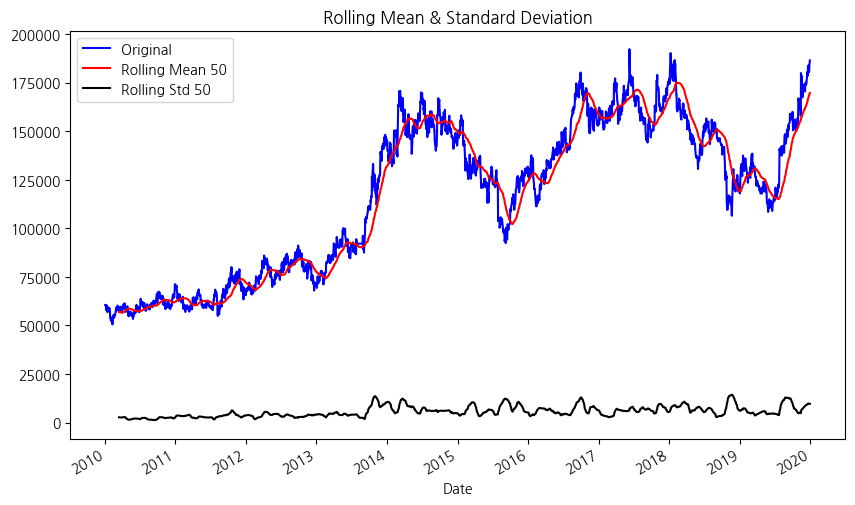

In [37]:
def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    
    #Plot rolling statistics:
    
    plt.figure(figsize=(10, 6))
    plt.xlabel('Date')
    
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean {}'.format(interval))
    std = plt.plot(rolstd, color='black', label = 'Rolling Std {}'.format(interval))
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    locator = mdate.YearLocator()
    plt.gca().xaxis.set_major_locator(locator)
    plt.gcf().autofmt_xdate()
    
    plt.show()

plot_rolling(data, 50)

In [38]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values, autolag="AIC")
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

print('ADF TEST 결과')
adf_test(data)

ADF TEST 결과
ADF Statistics: -1.207101
p-value: 0.670534
num of lags: 4.000000
num of observations: 2461.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


<Axes: xlabel='일자'>

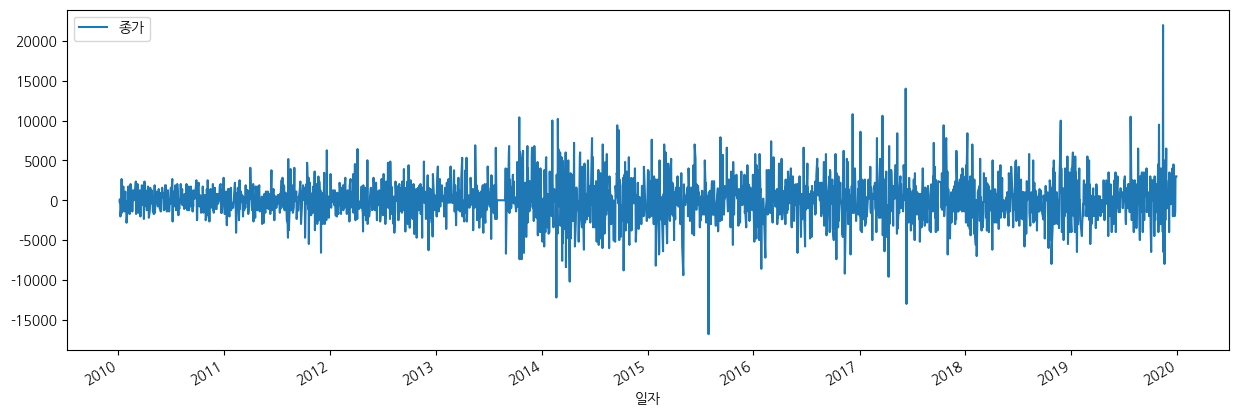

In [39]:
dff1 = data.diff().dropna()
dff1.plot(figsize=(15,5))

In [40]:
# 차분 테이터 adf테스트
print('ADF TEST 결과')
adf_test(dff1)

ADF TEST 결과
ADF Statistics: -27.211310
p-value: 0.000000
num of lags: 3.000000
num of observations: 2461.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

In [67]:
df_test = pd.read_csv("../data/stocks/nav_years.csv").sort_values(by="일자", ascending=True)
df_test = df_test[["일자", "종가"]]
df_test.iloc[:, 0] = pd.to_datetime(df_test["일자"], format="%Y/%m/%d")
df_test.set_index("일자", inplace=True)

/home/john/venv/eda_venv/lib/python3.10/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


![alt text](<Screenshot from 2025-03-25 17-08-52.png>)

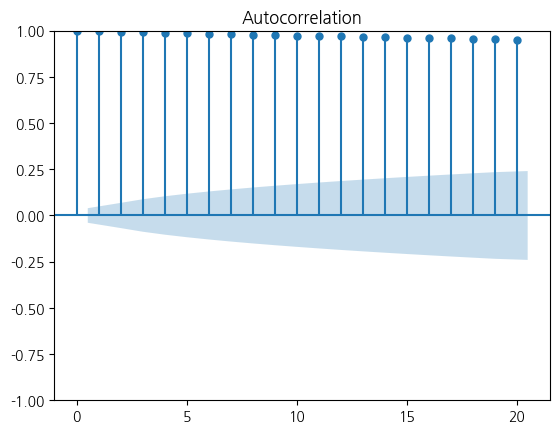

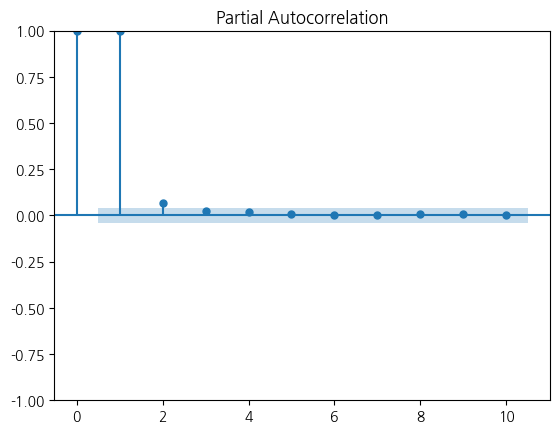

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data, lags=20)
plot_pacf(data, lags=10)
plt.show()

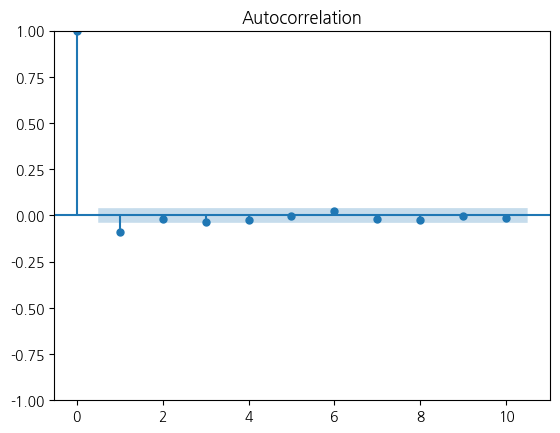

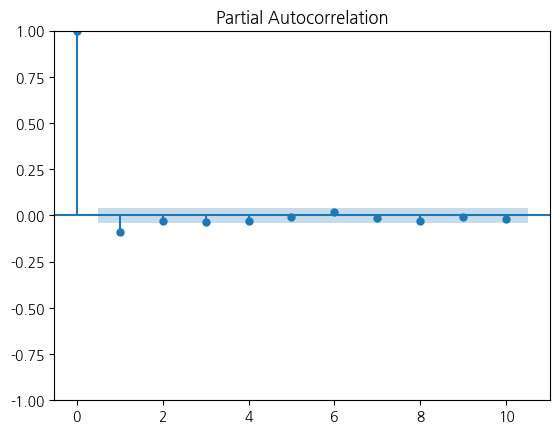

In [44]:
plot_acf(dff1, lags=10)

plot_pacf(dff1, lags=10)
plt.show()

In [76]:
model = ARIMA(data["종가"], order = (1, 1, 3))
arima = model.fit()
arima.summary()

/home/john/venv/eda_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/john/venv/eda_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/john/venv/eda_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     종가   No. Observations:                 2466
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -22873.069
Date:                Tue, 25 Mar 2025   AIC                          45756.138
Time:                        18:24:43   BIC                          45785.188
Sample:                             0   HQIC                         45766.692
                               - 2466                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6520      0.224      2.912      0.004       0.213       1.091
ma.L1         -0.7334      0.225     -3.264      0.001      -1.174      -0.293
ma.L2          0.0298      0.029      1.028      0.304      -0.027       0.087
ma.L3         -0.0150      0.022     -0.679      0.497      -0.058       0.028
sigma2      6.739e+06   1.05e+05     64.167      0.000    6.53e+06    6.94e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):              2345.48
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               3.10   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

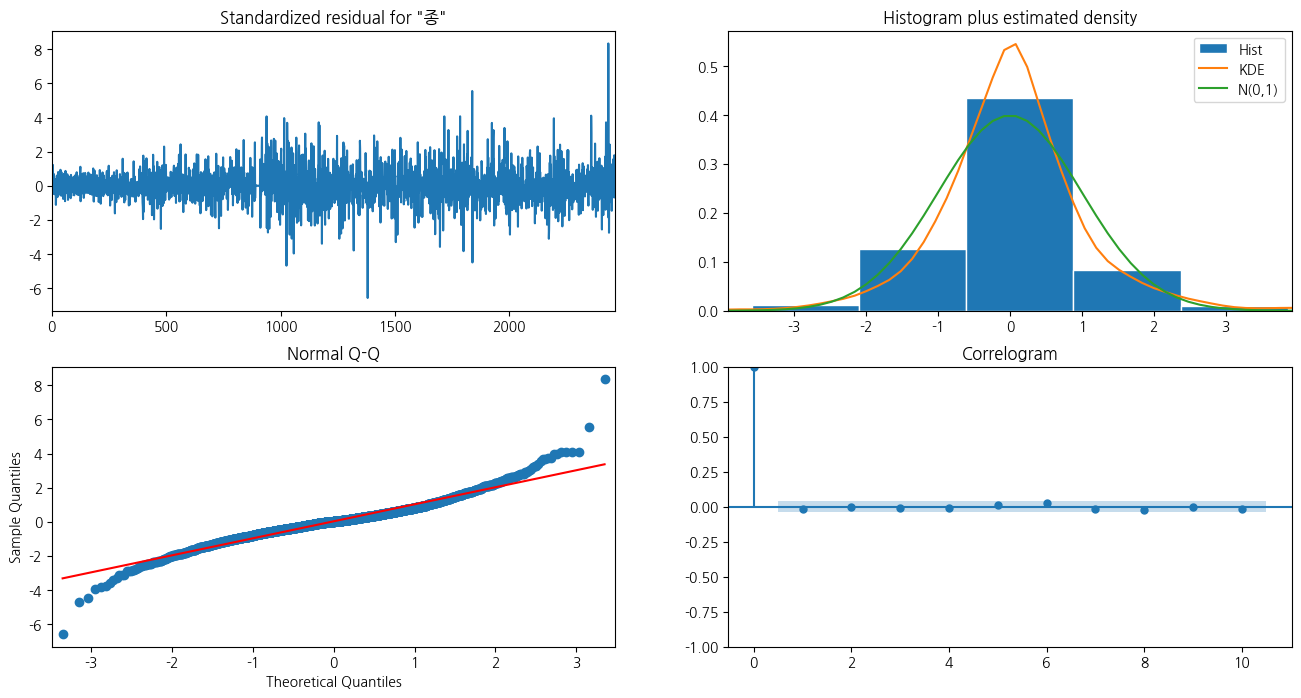

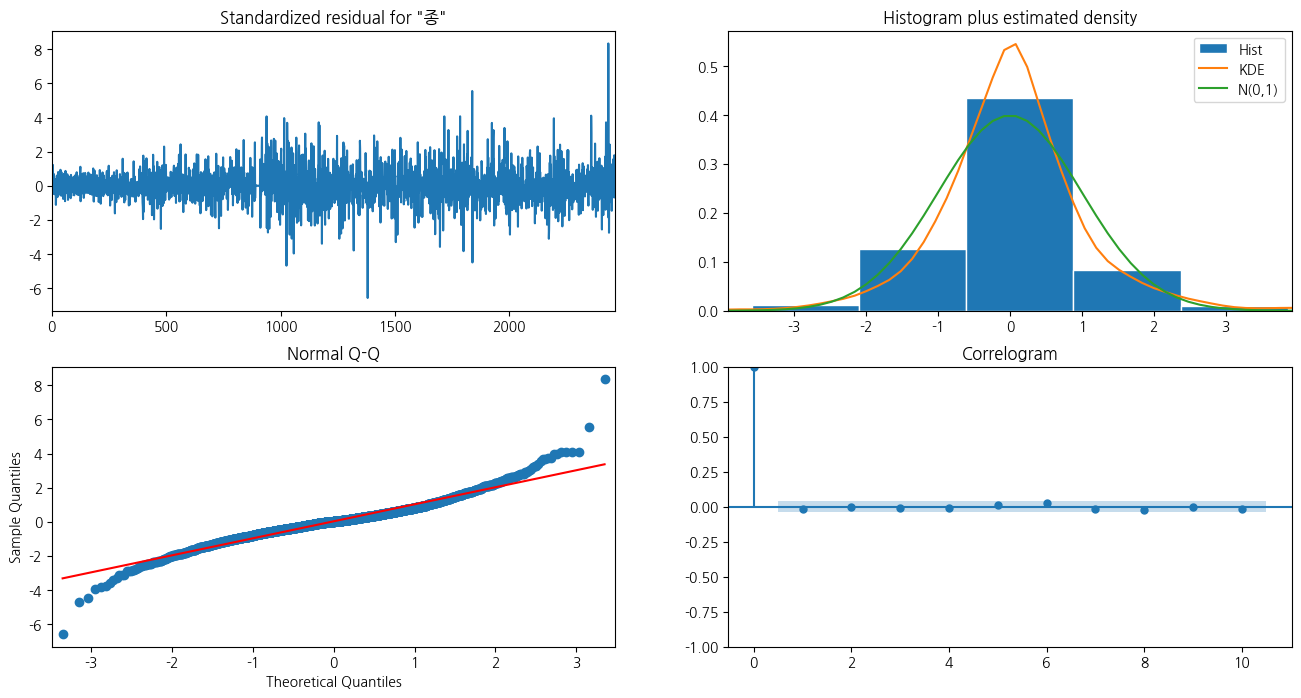

In [77]:
arima.plot_diagnostics(figsize=(16, 8))

In [70]:
import seaborn as sns

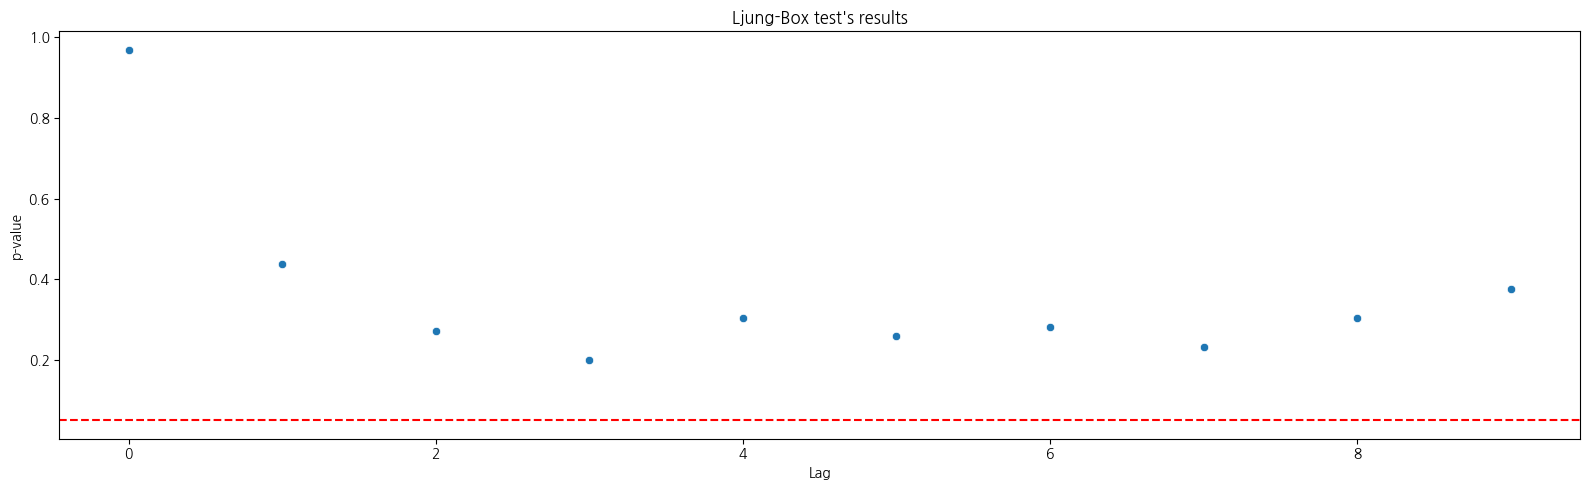

In [71]:
ljung_box_results = acorr_ljungbox(arima.resid)

fig, ax = plt.subplots(1, figsize=[16, 5])
sns.scatterplot(x=range(len(ljung_box_results["lb_pvalue"])), 
                y=ljung_box_results["lb_pvalue"], 
                ax=ax)
ax.axhline(0.05, ls='--', c='r')
ax.set(title="Ljung-Box test's results",
       xlabel='Lag',
       ylabel='p-value')

plt.tight_layout()
plt.show()

In [72]:
df_test

,종가
일자,
2020-01-02,182500
2020-01-03,181500
2020-01-06,180500
2020-01-07,187000
2020-01-08,183000
...,...
2020-12-23,284000
2020-12-24,282000
2020-12-28,281000


In [62]:
df_test.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
               '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
      

In [79]:
num = len(df_test)
arima_pred = arima.forecast(num)
df_pred = pd.DataFrame(arima_pred)

df_pred["predicted_mean"].values

/home/john/venv/eda_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


array([186187.26489704, 186035.57385997, 185888.14017809, 185792.017995  ,
       185729.349316  , 185688.49128302, 185661.85311407, 185644.48585497,
       185633.16294125, 185625.78075306, 185620.96779556, 185617.8298967 ,
       185615.78408407, 185614.45027775, 185613.58067744, 185613.01372504,
       185612.64408968, 185612.4030989 , 185612.24598039, 185612.143544  ,
       185612.07675866, 185612.03321669, 185612.00482867, 185611.98632057,
       185611.97425386, 185611.96638674, 185611.96125762, 185611.9579136 ,
       185611.9557334 , 185611.95431197, 185611.95338525, 185611.95278106,
       185611.95238714, 185611.95213032, 185611.95196288, 185611.95185371,
       185611.95178254, 185611.95173614, 185611.95170589, 185611.95168616,
       185611.9516733 , 185611.95166492, 185611.95165945, 185611.95165589,
       185611.95165357, 185611.95165205, 185611.95165106, 185611.95165042,
       185611.95165   , 185611.95164973, 185611.95164955, 185611.95164943,
       185611.95164935, 1

In [80]:
merged = df_test.copy()
merged["예측"] = df_pred["predicted_mean"].values
# merged.iloc[[0, 2]] = 16180
merged["diff"] = merged["예측"] - merged["종가"]

merged

,종가,예측,diff
일자,,,
2020-01-02,182500,186187.264897,3687.264897
2020-01-03,181500,186035.573860,4535.573860
2020-01-06,180500,185888.140178,5388.140178
2020-01-07,187000,185792.017995,-1207.982005
2020-01-08,183000,185729.349316,2729.349316
...,...,...,...
2020-12-23,284000,185611.951649,-98388.048351
2020-12-24,282000,185611.951649,-96388.048351
2020-12-28,281000,185611.951649,-95388.048351


In [65]:
import datetime as dt
from datetime import timedelta

today = dt.datetime.today()
today_list = str(today).split(" ")[0]

last_weekday = today - timedelta(days=1)
while last_weekday.weekday() in [5, 6]:
    last_weekday -= timedelta(days=1)

day_before_lw = last_weekday - timedelta(days=1)
while day_before_lw.weekday() in [5, 6]:
    day_before_lw -= timedelta(days=1)

last_weekday, day_before_lw

(datetime.datetime(2025, 3, 24, 18, 2, 57, 48920),
 datetime.datetime(2025, 3, 21, 18, 2, 57, 48920))

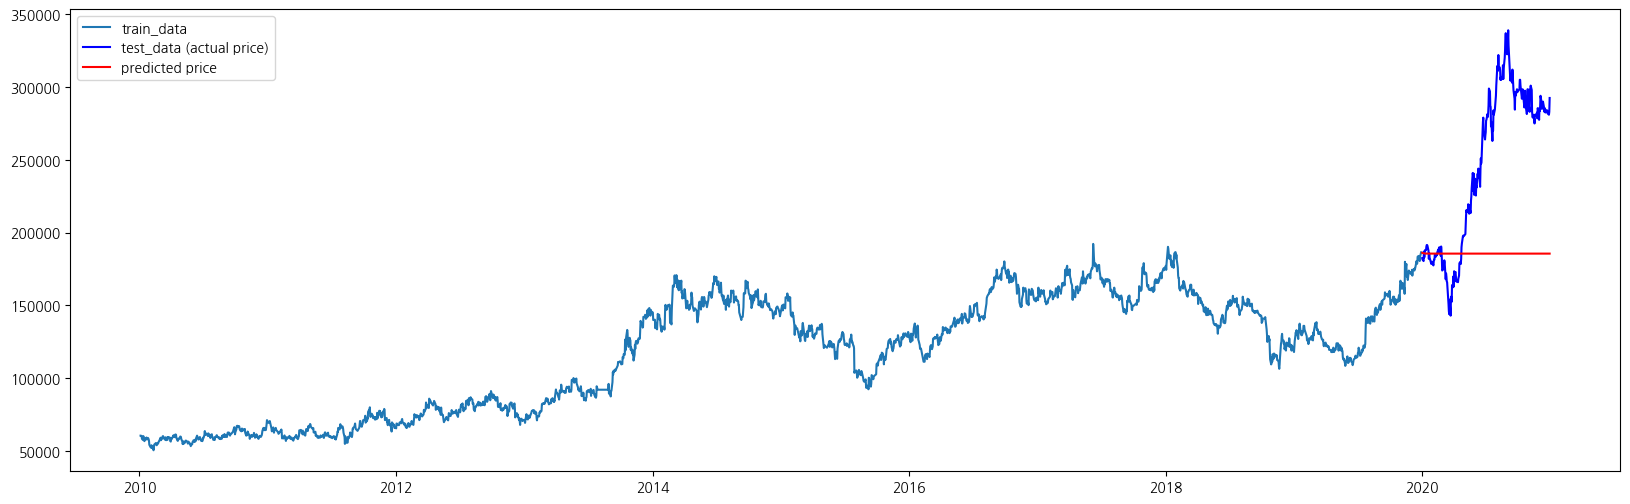

In [81]:
plt.figure(figsize=(20,6))
plt.plot(data, label="train_data")
plt.plot(merged["종가"], c="b", label="test_data (actual price)")
plt.plot(merged["예측"], c="r",label="predicted price")
plt.legend(loc="upper left")
plt.show()